In [2]:
import zipfile
import pandas as pd

In [3]:
# specify the path and name of the zip file
zip_file = "data/archive.zip"

# open and save the file unziped
with zipfile.ZipFile(zip_file) as ziped_data:
    ziped_data.extractall('data/')


df = pd.read_csv('data/billionaire_list_20yrs.csv', index_col=0)
df = df.reset_index(drop=True)

# Cleaning Data

In [4]:
# !pip install matplotlib

In [5]:
import matplotlib.pyplot as plt

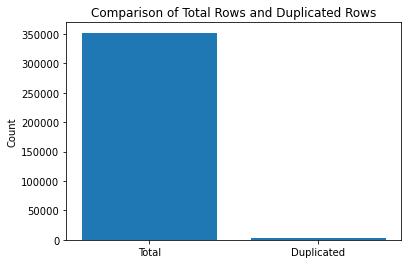

In [6]:
total_rows = df.shape[0]
duplicated_rows = df.duplicated().sum()

fig, ax = plt.subplots()

ax.bar(['Total', 'Duplicated'], [total_rows, duplicated_rows])
ax.set_ylabel('Count')
ax.set_title('Comparison of Total Rows and Duplicated Rows')
plt.show()

In [7]:
df = df.drop_duplicates()

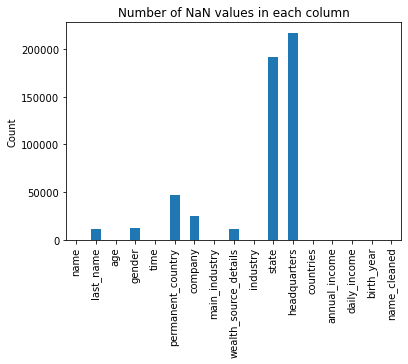

In [8]:
# Count the number of NaN values in each column
nan_counts = df.isna().sum()

# Create the bar plot
fig, ax = plt.subplots()
nan_counts.plot(kind='bar')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Number of NaN values in each column')

plt.show()

In [9]:
df.isna().sum()

name                          0
last_name                 10828
age                           0
gender                    11870
time                          0
permanent_country         47283
company                   25268
main_industry                 0
wealth_source_details     10900
industry                     49
state                    191981
headquarters             217290
countries                     0
annual_income                 0
daily_income                  0
birth_year                    0
name_cleaned                  0
dtype: int64

In [10]:
df = df.drop('last_name', axis=1)

#
df['gender'] = df['gender'].fillna('undefined')
df['permanent_country'] = df['permanent_country'].fillna('undefined')
df['company'] = df['company'].fillna('undefined')
df['wealth_source_details'] = df['wealth_source_details'].fillna('undefined')

# 
df['headquarters'] = df['headquarters'].fillna('not identified')
df['state'] = df['state'].fillna('not identified')

#
df['industry'] = df['industry'].fillna('undefined')

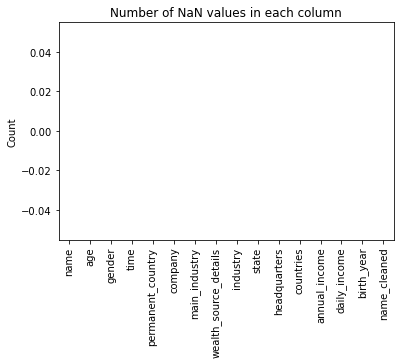

In [11]:
# Count the number of NaN values in each column
nan_counts = df.isna().sum()

# Create the bar plot
fig, ax = plt.subplots()
nan_counts.plot(kind='bar')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Number of NaN values in each column')

plt.show()

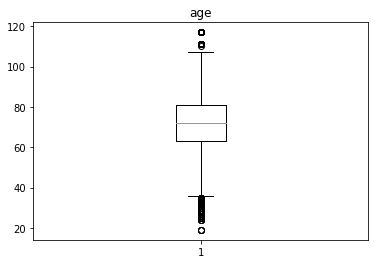

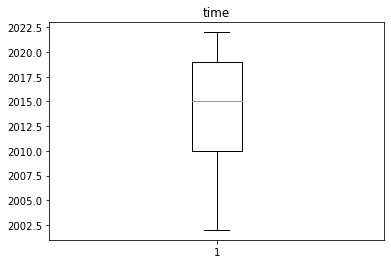

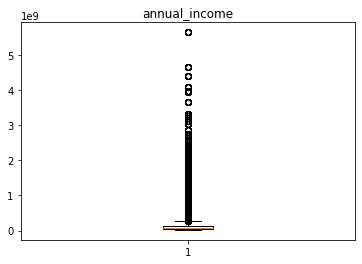

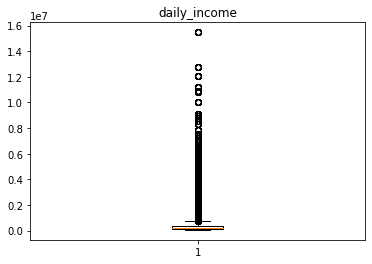

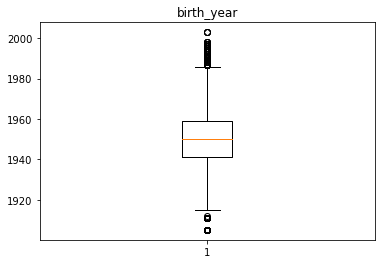

In [12]:
# get the numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# create box plots for each numeric column
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [13]:
df.sort_values(by='age', ascending=False).head()

,name,age,gender,time,permanent_country,company,main_industry,wealth_source_details,industry,state,headquarters,countries,annual_income,daily_income,birth_year,name_cleaned
182214,Kwee Liong Phing,117,undefined,2014,Singapore,Mehmet Hattat;Pontiac Land,Real Estate,Real Estate; Pontiac Land Group; real estate,Real Estate;Real Estate;Developer;Real estate,not identified,not identified,sgp,31574400,82078,1905,kwee_liong_phing
182248,Kwee Liong Phing,117,undefined,2017,Singapore,Mehmet Hattat;Pontiac Land,Real Estate,Real Estate; Pontiac Land Group; real estate,Real Estate;Real Estate;Developer;Real estate,not identified,not identified,sgp,30600000,86071,1905,kwee_liong_phing
182254,Kwee Liong Phing,117,undefined,2018,Singapore,Mehmet Hattat;Pontiac Land,Real Estate,Real Estate; Pontiac Land Group; real estate,Real Estate;Real Estate;Developer;Real estate,not identified,not identified,sgp,32088000,82078,1905,kwee_liong_phing
182253,Kwee Liong Phing,117,undefined,2018,Singapore,Mehmet Hattat;Pontiac Land,Real Estate,Real Estate; Pontiac Land Group; real estate,Real Estate;Real Estate;Developer;Real estate,not identified,not identified,sgp,32088000,86505,1905,kwee_liong_phing
182252,Kwee Liong Phing,117,undefined,2018,Singapore,Mehmet Hattat;Pontiac Land,Real Estate,Real Estate; Pontiac Land Group; real estate,Real Estate;Real Estate;Developer;Real estate,not identified,not identified,sgp,32088000,77733,1905,kwee_liong_phing


In [14]:
olders_age = df[df['age']>100]
olders = olders_age[['name','age','birth_year']].drop_duplicates().sort_values(by='age')

In [15]:
olders

,name,age,birth_year
338198,"William Moncrief, Jr.",101,1921
333279,Wang Yung-Tsai,101,1921
165062,John Sperling,101,1921
19690,Aloysio de Andrade Faria,101,1921
172630,Karl Albrecht,101,1921
207025,Marcel Adams,101,1921
1753,Jacques Gaston Murray,101,1921
11219,Alberto Benavides,101,1921
27723,Anne Cox Chambers,102,1920
48377,Carl Lindner Jr,102,1920


In [16]:
df.loc[df['name']=='Muktar Widjaja', 'birth_year'] = 1955
df.loc[df['name']=='Kwee Liong Phing', 'birth_year'] = 1945
df.loc[df['name']=='Kenneth C Rowe', 'birth_year'] = 1935

df['age'] = 2022 - df['birth_year']

In [17]:
df.describe()

,age,time,annual_income,daily_income,birth_year
count,349950.000000,349950.000000,3.499500e+05,3.499500e+05,349950.000000
mean,72.105527,2014.223786,1.441637e+08,3.949524e+05,1949.894473
std,13.204831,5.477081,2.343326e+08,6.420295e+05,13.204831
min,19.000000,2002.000000,1.681350e+07,4.606400e+04,1911.000000
25%,63.000000,2010.000000,4.891200e+07,1.340050e+05,1941.000000
50%,72.000000,2015.000000,7.642500e+07,2.093830e+05,1950.000000
75%,81.000000,2019.000000,1.402500e+08,3.842460e+05,1959.000000
max,111.000000,2022.000000,5.650200e+09,1.548000e+07,2003.000000


In [20]:
!pip install pycountry

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681895 sha256=e4c17d891a0daf8306b76c21a0fa93c67ac1abb3f76f321bbddf01895b1ba21f
  Stored in directory: c:\users\lfroes\appdata\local\pip\cache\wheels\47\15\92\e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [23]:
#!pip install opencv-python

In [24]:
import pycountry

country_names = [country.name.lower() for country in pycountry.countries]

select_country_name = lambda x,p: x.lower().split('-')[p].strip()

countries_dataset = [select_country_name(x=country, p=0) for country in df['permanent_country'].unique().tolist()]

not_a_country = []
for country in countries_dataset:
    if country not in country_names and country != 'undefined' and country not in not_a_country:
        not_a_country.append(country)

replacements = {
    'usa': 'United States',
    'uk': 'United Kingdom',
    'chinese taipei': 'Taiwan',
    'uae': 'United Arab Emirates',
    'chinachangsha': 'China',
    'dubai': 'United Arab Emirates',
    'united statesnew jersey': 'United States',
    'melbourne': 'Australia'
 }

df['permanent_country_names'] = df['permanent_country'].apply(select_country_name,p=0)

df['permanent_country_names'] = df['permanent_country_names'].replace(replacements)

df['permanent_city_names'] = df['permanent_country'].apply(select_country_name,p=-1)



In [29]:
df.columns

Index(['name', 'age', 'gender', 'time', 'permanent_country', 'company',
       'main_industry', 'wealth_source_details', 'industry', 'state',
       'headquarters', 'countries', 'annual_income', 'daily_income',
       'birth_year', 'name_cleaned', 'permanent_country_names',
       'permanent_city_names'],
      dtype='object')

In [31]:
age_x_income = df[['name','gender','annual_income']]

In [32]:
age_x_income

,name,gender,annual_income
0,Abdulla bin Ahmad Al Ghurair,M,95604000
1,Abdulla bin Ahmad Al Ghurair,M,95604000
2,Abdulla bin Ahmad Al Ghurair,M,95604000
3,Abdulla bin Ahmad Al Ghurair,M,95604000
4,Abdulla bin Ahmad Al Ghurair,M,95604000
...,...,...,...
352364,Zygmunt Solorz-Zak,M,74820000
352365,Zygmunt Solorz-Zak,M,74820000
352366,Zygmunt Solorz-Zak,M,74820000
352367,Zygmunt Solorz-Zak,M,74820000


In [19]:
# ideias inicias
# preço por localização
# Preço por console
# Preço por fabricante

In [8]:
import psycopg2
import os

def connect_db(database="", user="", password="", host="", port=5432):
    try:
        conn = psycopg2.connect(
            database=database,
            user=user,
            password=password,
            host=host,
            port=port
        )
        return conn
    except psycopg2.Error as e:
        # Handle the exception
        print("Unable to connect to the database:", e)

conn = connect_db(database="gamesdb", user="postgres", password="postgres", host="localhost")

In [7]:
# Open a cursor to perform database operations
cur = conn.cursor()

# Execute a query
cur.execute("""
            CREATE TABLE games( id INT,
            origin VARCHAR(255),
            retailer VARCHAR(255),
            manufacturer VARCHAR(255),
            console VARCHAR(255),
            genre VARCHAR(255),
            title VARCHAR(255),
            price DECIMAL(10,2),
            currency VARCHAR(10),
            disponibility BOOLEAN """)

# Fetch the query results
rows = cur.fetchall()

# Close the cursor and the database connection
cur.close()
conn.close()

UndefinedTable: relation "your_table_name" does not exist
LINE 1: SELECT * FROM your_table_name
                      ^
